In [1]:
import os
import pandas as pd

os.makedirs("tables", exist_ok=True)
os.makedirs("plots", exist_ok=True)

log_cv   = pd.read_csv("tables/logistic_cv_results.csv")
log_test = pd.read_csv("tables/logistic_test_metrics.csv")

knn_cv   = pd.read_csv("tables/knn_cv_results.csv")
knn_test = pd.read_csv("tables/knn_test_performance.csv")

dt_res   = pd.read_csv("tables/dt_results.csv")

def get_accuracy_flex(df):
    cols = set(df.columns)
    if {"metric", "value"} <= cols:
        return df.loc[df["metric"] == "accuracy", "value"].iloc[0]
    if "test_accuracy" in cols:
        return df["test_accuracy"].iloc[0]
    if "accuracy" in cols:
        return df["accuracy"].iloc[0]
    raise ValueError(f"No accuracy column found. Columns are: {df.columns.tolist()}")

log_cv_best  = log_cv["mean_test_score"].max()
knn_cv_best  = knn_cv["mean_test_score"].max()
dt_cv_best   = dt_res["cv_mean_accuracy"].iloc[0]

log_test_acc = get_accuracy_flex(log_test)
knn_test_acc = get_accuracy_flex(knn_test)
dt_test_acc  = dt_res["test_accuracy"].iloc[0]

all_results = pd.DataFrame({
    "model": ["Logistic Regression", "KNN", "Decision Tree"],
    "cv_best_accuracy": [log_cv_best, knn_cv_best, dt_cv_best],
    "test_accuracy": [log_test_acc, knn_test_acc, dt_test_acc],
})

all_results.to_csv("tables/model_comparison.csv", index=False)
all_results


,model,cv_best_accuracy,test_accuracy
0,Logistic Regression,0.836808,0.825112
1,KNN,0.806857,0.798206
2,Decision Tree,0.811379,0.784753


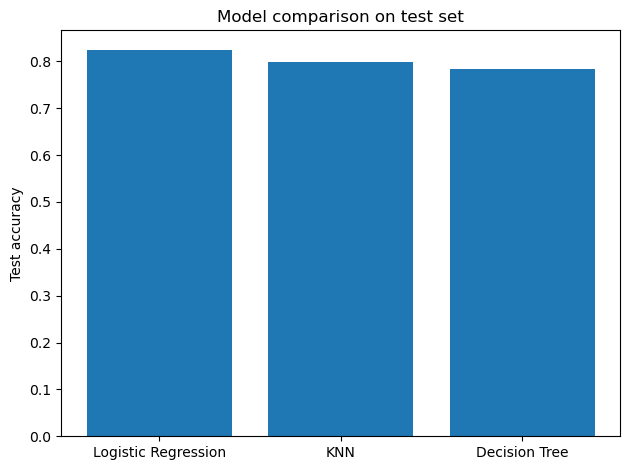

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(all_results["model"], all_results["test_accuracy"])
plt.ylabel("Test accuracy")
plt.title("Model comparison on test set")
plt.tight_layout()
plt.savefig("plots/model_comparison_accuracy.png")
plt.show()
plt.close()